In [1]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy

In [2]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

notes_reverse = copy.deepcopy(notes)
notes_reverse.reverse()

In [3]:
def get_chord_type(chord, 
                   chord_note):
    
    chord = chord.split('/')[0]
    chord_type = chord.replace(chord_note, '')
    
    return chord_type

In [4]:
folder = '../corpus/chords_and_chromas/'
df_model = pd.DataFrame(columns=notes + ['chord_type', 'chord_note','song'])
songs_with_errors = []

for file in os.listdir(folder):
    
    song = file.split('.csv')[0]
    df = pd.read_csv(folder + '/' + file)
    df['song'] = song
    
    
    try:
        df['chord_type'] = df.apply(lambda x:get_chord_type(x[song],
                                                            x['chord_note']),
                                    axis=1)

        # renomeando para usar apenas bemóis em vez de sustenidos
        notes_old = list(df.columns[5:-1])
        
        df.rename(columns=dict(zip(notes_old, notes)), inplace=True)
        df_input_output = df.copy()#df[(df.chord_type == '7') | (df.chord_type == 'min7')]
        df_input_output = df_input_output[notes + ['chord_type', 'chord_note','song']]

        df_model = df_model.append(df_input_output)
        print(song)
        
    except Exception as e:
#         print(str(e))
        songs_with_errors.append(song)

BlueBossa
For Mods Only
Soulville
MamboInn
Whilemyladysleeps
Theme
SoulStation
lhcd
MelodyForC
IsYouIsOrIsYouAintMyBaby
BeautifulLove
Root Down
MysticBrew
Cold duck Lead
Clouds
Midnight Blue
LullabyOfTheLeaves
Jazz Crimes
Dumaine St
gonehomeC#
728
HeadinHome
Lotus Blossom
Groovin'
dat dere
Cat, TheEb
AppointmentInGhana
Cinnamon and Clove
psychedelic sally C
Tune 88
Cariba
Somethin' Special
Spiral
Liberia
Bluesinthebasement
Brother Ray
Mean GreansII
WithoutYou
Isn't She Lovely
chicken
TheOddCouple
feellike
filthy mcnasty
BluesMarch
Moonglow
OnTheSunnySideOfTheStreet
Sham Time
OnTheSunnySideOfTheStreet_II
SweetEmma
FairWeather
Montara
Seventeen West
BluesInH
Cantaloupe Island
News For Lulu
SoulStreet
Cousin Mary
Twistin'
StrasbourgII
Bemsha Swing
Jean De Fleur
AlwaysThere
YardbirdSuite
Saint James
SoulfulStrut
Somethin Else
WineLight
Outro_Transcription
GrazingInTheGrassII
Velocity
ImNotSoSure
UmmhC
JigAJugC
peopleMake
A smooth One
betty1
CapeVerdeanBlues
Comin' Home Baby
ItAintNec(Green

In [5]:
len(songs_with_errors)

48

### Enarmonia

In [6]:
notes_letters = ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'C']

def sustenido_to_bemol(note):
    
    if '#' in note:
        note = note[0]
        ind_note = notes_letters.index(note)
        ind_new = ind_note+1
        
        note_out = notes_letters[ind_new] + 'b'
        
    else:
        note_out = note
        
    return note_out

In [7]:
df_model['chord_note'] = df_model['chord_note'].map(sustenido_to_bemol)

In [8]:
df_model.pivot_table(values='song', index='chord_type', columns='chord_note', aggfunc='count')[notes]

chord_note,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
chord_type,,,,,,,,,,,,
,139.0,89.0,54.0,83.0,75.0,141.0,23.0,63.0,89.0,47.0,100.0,23.0
13,45.0,11.0,5.0,13.0,7.0,27.0,22.0,96.0,27.0,44.0,72.0,45.0
13(#9),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
5,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
6,5.0,2.0,4.0,2.0,NaN,16.0,NaN,2.0,5.0,6.0,3.0,NaN
7,470.0,178.0,322.0,392.0,167.0,524.0,125.0,569.0,295.0,326.0,666.0,174.0
7(#11),4.0,1.0,3.0,6.0,NaN,7.0,1.0,2.0,4.0,1.0,1.0,NaN
7(#5),NaN,NaN,NaN,NaN,1.0,NaN,1.0,5.0,2.0,NaN,NaN,NaN
7(#9),46.0,6.0,31.0,19.0,31.0,54.0,2.0,29.0,3.0,20.0,11.0,7.0


In [9]:
df_model[df_model.chord_type == 'maj13']

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,chord_type,chord_note,song
11,641.753784,406.233734,364.419525,430.578705,232.356445,376.348724,478.606964,658.408325,2833.137451,603.652954,138.511398,285.269531,maj13,Ab,WithoutYou
5,2487.888916,2993.882812,3681.774414,2838.835938,1472.422485,2647.601074,4293.702148,1870.577271,1978.193970,1077.436890,2005.614746,866.695984,maj13,Db,StrasbourgII
17,2187.889404,1051.225342,952.081299,3018.063721,1405.808594,2394.341797,4052.501953,1592.096069,2156.733643,755.674988,1890.501587,806.756287,maj13,Db,StrasbourgII
12,10.858443,18.012165,19.578646,122.009621,186.442184,38.299488,72.339478,61.267727,213.442795,52.117874,19.235718,35.093472,maj13,D,OneShiningSoul
101,261.076904,538.761536,134.129135,274.352905,981.767029,281.461853,137.703354,142.919876,438.782837,106.700493,110.724129,554.975708,maj13,D,OneShiningSoul
13,33.039455,53.849762,92.276733,27.262934,38.216488,175.141907,43.682873,60.486141,20.759542,28.229660,92.024940,30.442518,maj13,A,RainbowVisions
21,29.685209,56.023575,99.373688,30.172609,43.383770,166.056229,36.482727,11.484145,36.381065,35.407200,92.582741,29.717567,maj13,A,RainbowVisions
21,2606.385498,864.782288,1103.968872,851.763000,1006.464111,903.760071,4319.019531,2335.588623,614.761536,1257.858887,716.049561,2638.044922,maj13,G,Bold and Black
34,603.764465,245.787720,471.155792,433.269989,321.012482,900.383606,405.713959,625.154846,665.378540,726.700684,757.204895,241.815872,maj13,Eb,lyresto
38,644.691528,210.330307,412.345978,502.216644,352.695221,943.190613,392.833954,638.326172,612.895264,362.102570,794.194397,249.929184,maj13,Eb,lyresto


In [41]:
def correct_types(chord_type):
    
    if chord_type == '5':
        return ''
    
    if '#5' in chord_type:
        new_chord_type = chord_type.replace('#5', 'b13')
        return new_chord_type
    
    elif chord_type == 'augmented':
        return 'b13'
    
    elif chord_type == 'augmented-seventh':
        return '7(b13)'
    
    elif chord_type == '7sus(07)':
        return '7sus4'
    
    elif chord_type == '7(b5)':
        return '7(#11)'
    
    elif chord_type == 'min7(b5)' or chord_type == 'minor-seventh(b5)':
        return 'dim7'
    
    elif chord_type == '9(0#3)':
        return '9(13)'
    
    elif chord_type == 'dominant(#9)':
        return '7(#9)'
    
    elif chord_type == 'm7' or chord_type == 'mi7':
        return 'min7'
    
    elif chord_type == 'min7(0##)':
        return 'min7(11)'
    
    elif chord_type == 'min7(09)':
        return 'min7(9)'
    
    elif chord_type == 'ma7':
        return 'maj7'
    
    elif chord_type == 'maj':
        return ''
    
    elif chord_type == '13' or chord_type == 'maj13':
        return '7(13)'
    
    elif chord_type == 'major(09)' or chord_type == 'maj9':
        return '9'
    
    elif chord_type == 'maj6':
        return '6'
    
    elif chord_type == 'major-minor(09)':
        return 'min9'
    
#     if 'maj13' in chord_type:
#         new_chord = chord_type.replace('maj13','13')
#         return new_chord
    
#     if '6' in chord_type:
#         new_chord = chord_type.replace('6','13')
#         return new_chord
    
    else:
        return chord_type

In [42]:
df_model['new_chord_type'] = df_model['chord_type'].map(correct_types)

In [43]:
# df_model.pivot_table(values='song', index='new_chord_type', columns='chord_note', aggfunc='count')[notes]
count_types = df_model.groupby('new_chord_type')[['song']].count()
count_types = count_types.sort_values('song', ascending=False)
count_types
# count_types.plot(kind='bar', figsize=(22,8));
# plt.xticks(rotation=20);
# plt.legend('')

,song
new_chord_type,
7,4208
min7,2969
maj7,1088
,986
9,574
7(13),427
7(#9),262
min,195
dim7,170


In [44]:
df_model.pivot_table(values='song', index='new_chord_type', columns='chord_note', aggfunc='count')[notes]

chord_note,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
new_chord_type,,,,,,,,,,,,
,165.0,89.0,57.0,88.0,78.0,147.0,28.0,68.0,92.0,47.0,104.0,23.0
13(#9),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
6,5.0,3.0,4.0,3.0,NaN,18.0,NaN,8.0,5.0,6.0,3.0,NaN
7,470.0,178.0,322.0,392.0,167.0,524.0,125.0,569.0,295.0,326.0,666.0,174.0
7(#11),4.0,1.0,6.0,9.0,2.0,8.0,2.0,5.0,4.0,1.0,3.0,1.0
7(#9),47.0,6.0,31.0,19.0,31.0,56.0,2.0,29.0,3.0,20.0,11.0,7.0
7(13),45.0,14.0,7.0,15.0,8.0,27.0,22.0,97.0,29.0,46.0,72.0,45.0
7(b13),2.0,NaN,1.0,NaN,2.0,NaN,1.0,5.0,2.0,NaN,NaN,NaN
7(b9),3.0,NaN,4.0,1.0,NaN,NaN,1.0,5.0,NaN,3.0,NaN,1.0


In [45]:
# df_model[df_model.chord_type == 'min7(b5)']

Ideia: criar uma correspondência entre os acordes tensionados e suas formas sem tensões (com apenas 4 notas). Ex.: um acorde de dó maior com 7a e 9a (C7(9)) seria mapeado em apenas C7.

In [46]:
list(set(df_model.new_chord_type))

['',
 '7sus4',
 '7(13)',
 'sus',
 '7',
 'min11',
 'min9',
 'maj7',
 'min(maj7)',
 'min7(9)',
 '6',
 '7(b9)',
 'b13',
 '9(13)',
 'dim',
 'min7',
 '7(#11)',
 'min6',
 '9',
 'maj7(#11)',
 '7(#9)',
 '9(#11)',
 'min13',
 'min',
 '7(b13)',
 'maj13(#11)',
 'maj7sus(b5)',
 'dim7',
 '13(#9)',
 'min7(11)']

### PENDÊNCIA: O que fazer com sus e 7sus4?

In [49]:
dict_simplified_chords = {'':'', 
                          '7sus4':'7sus4', 
                          '7(13)':'7', 
                          'sus':'sus', 
                         '7':'7', 
                          'min11':'min', 
                          'min9':'min', 
                          'maj7':'maj7', 
                          'min(maj7)':'min(maj7)', 
                          'min7(9)':'min7', 
                          '6':'6', 
                          '7(b9)':'7', 
                          'b13':'', 
                          '9(13)':'', 
                          'dim':'dim', 
                          'min7':'min7', 
                          '7(#11)':'7', 
                          'min6':'min6', 
                         '9':'', 
                          'maj7(#11)':'maj7', 
                          '7(#9)':'7', 
                          '9(#11)':'', 
                          'min13':'min6', 
                          'min':'min', 
                          '7(b13)':'7', 
                          'maj13(#11)':'6', 
                          'maj7sus(b5)':'DELETAR', 
                          'dim7':'dim7', 
                          '13(#9)':'6', 
                          'min7(11)':'min7'}

df_model['simplified_chord_type'] = df_model['new_chord_type'].map(dict_simplified_chords)

In [51]:
df_model.pivot_table(values='song', 
                     index='simplified_chord_type', 
                     columns='chord_note', 
                     aggfunc='count')[notes].fillna(0)

chord_note,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
simplified_chord_type,,,,,,,,,,,,
,227.0,130.0,105.0,172.0,120.0,207.0,69.0,135.0,154.0,68.0,129.0,52.0
6,6.0,6.0,4.0,5.0,0.0,18.0,1.0,8.0,7.0,6.0,6.0,0.0
7,571.0,199.0,371.0,436.0,210.0,615.0,153.0,710.0,333.0,396.0,752.0,228.0
7sus4,7.0,2.0,0.0,0.0,1.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0
DELETAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
dim,3.0,3.0,10.0,3.0,13.0,1.0,6.0,7.0,2.0,10.0,1.0,1.0
dim7,17.0,5.0,33.0,9.0,16.0,5.0,13.0,13.0,12.0,24.0,5.0,18.0
maj7,178.0,93.0,51.0,122.0,56.0,131.0,86.0,61.0,140.0,36.0,105.0,32.0
min,42.0,11.0,42.0,26.0,98.0,30.0,37.0,52.0,12.0,12.0,21.0,17.0


### Chroma max X Fundamental

In [52]:
func_max = lambda x: np.where(x==x.max())[0][0] + 1

In [53]:
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

In [56]:
df_model['note_number'] = df_model['chord_note'].map(dict(zip(notes, range(1,13))))

df_model.reset_index(inplace=True)

for i in df_model.index:
    chroma_max = df_model.loc[i][notes].max()
    df_model.at[i, notes] = (df_model.loc[i][notes]/chroma_max).values

In [57]:
df_model

,index,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,chord_type,chord_note,song,new_chord_type,simplified_chords,simplified_chord_type,note_number
0,0,0.237862,0.063720,0.149114,0.474675,0.143136,0.042312,0.149139,1.000000,0.173508,0.054512,0.270842,0.110597,min7,C,BlueBossa,min7,min7,min7,1
1,1,0.124195,0.036387,0.049591,0.212500,0.096230,0.074384,0.029844,0.175566,1.000000,0.231098,0.335907,0.071143,min7,F,BlueBossa,min7,min7,min7,6
2,2,0.182181,0.114379,0.372800,0.482567,0.285512,1.000000,0.244588,0.115174,0.266424,0.221959,0.298142,0.088151,7,Bb,BlueBossa,7,7,7,11
3,3,0.277075,0.149509,0.377614,0.158835,0.248054,1.000000,0.240128,0.054369,0.110412,0.246453,0.070788,0.056132,min7(b5),D,BlueBossa,dim7,dim7,dim7,3
4,4,0.071488,0.035779,0.086098,0.048187,0.068899,0.298317,0.101359,0.071071,0.025220,0.171025,1.000000,0.230316,7(#5),G,BlueBossa,7(b13),7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11417,11,0.153093,0.640566,0.163661,0.219482,1.000000,0.313992,0.119843,0.581936,0.321470,0.586989,0.116659,0.093444,7,A,moaninbari,7,7,7,10
11418,12,0.060346,0.112811,0.347673,0.111652,0.236884,1.000000,0.346312,0.544430,0.132611,0.247268,0.634368,0.120370,min7,G,moaninbari,min7,min7,min7,8
11419,13,0.633335,0.146671,0.207691,1.000000,0.513456,0.500745,0.101674,0.118728,0.158605,0.510848,0.130243,0.146037,7,F,moaninbari,7,7,7,6
11420,14,0.126573,0.130109,0.750783,0.330331,1.000000,0.200501,0.102392,0.441193,0.107734,0.053029,0.094324,0.570820,min7,E,moaninbari,min7,min7,min7,5



min6
min
6
7sus4
min(maj7)
DELETAR
dim
min7
7
sus
dim7
maj7


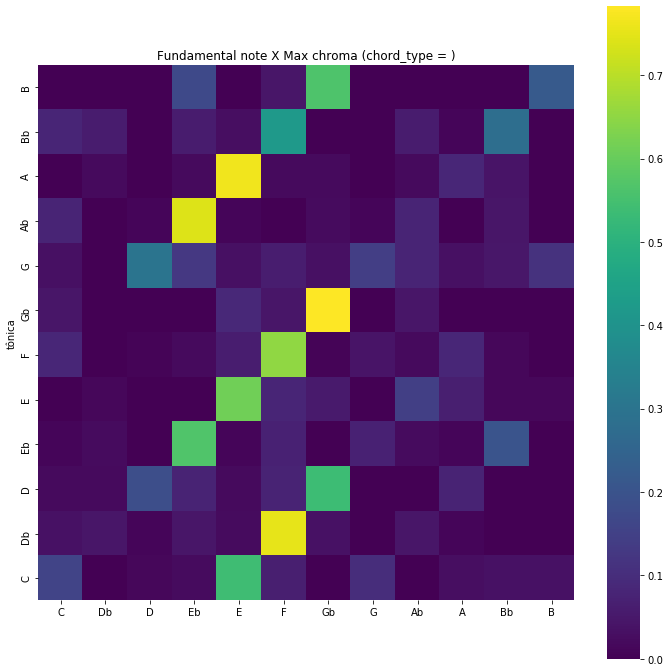

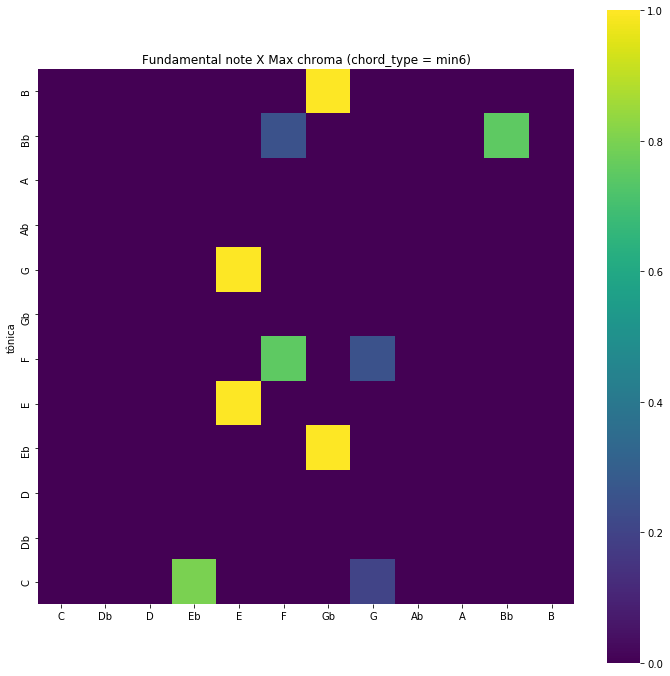

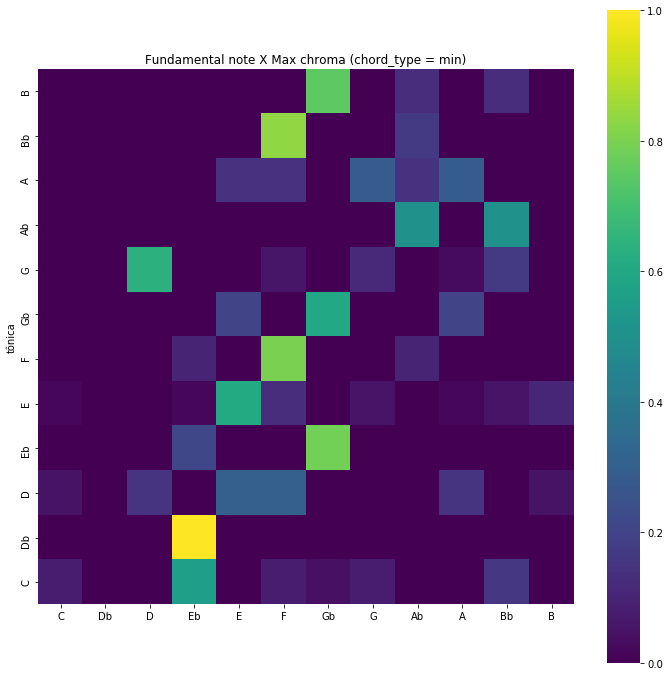

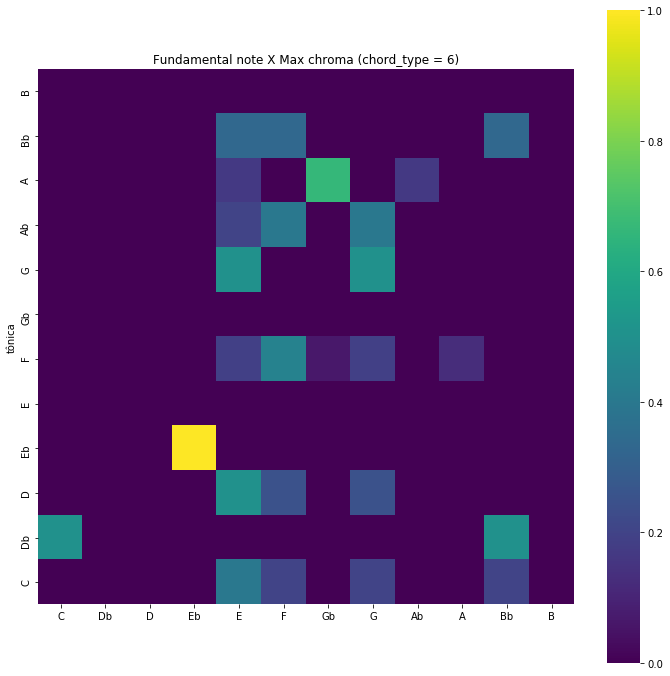

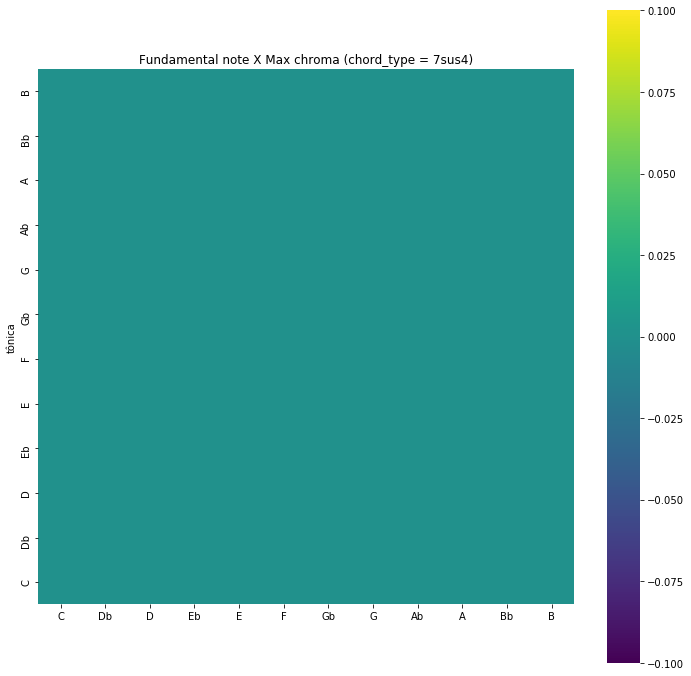

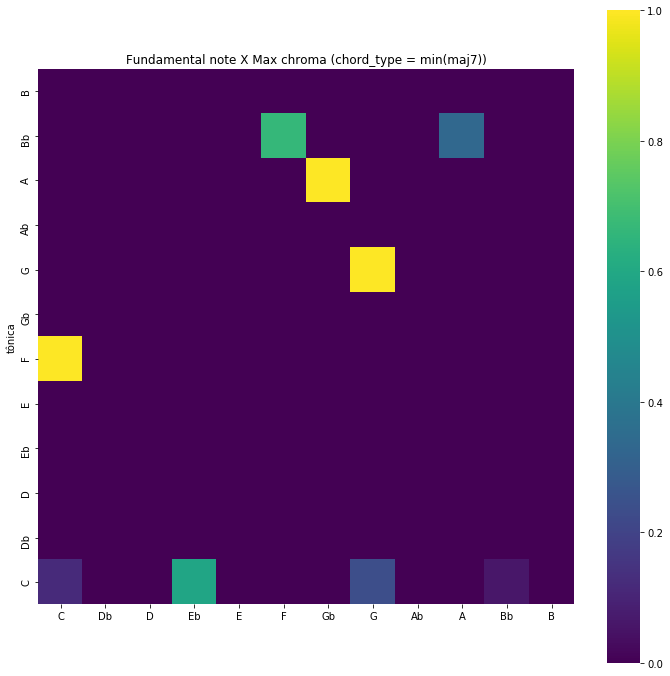

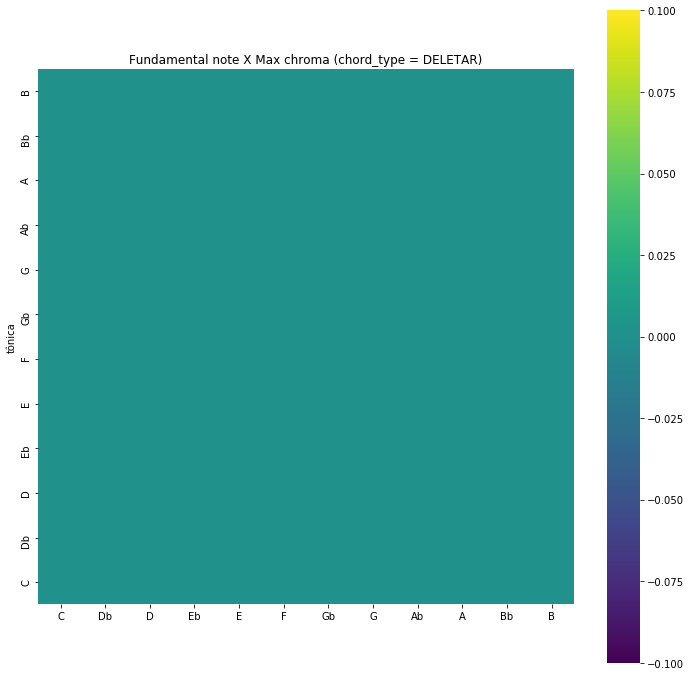

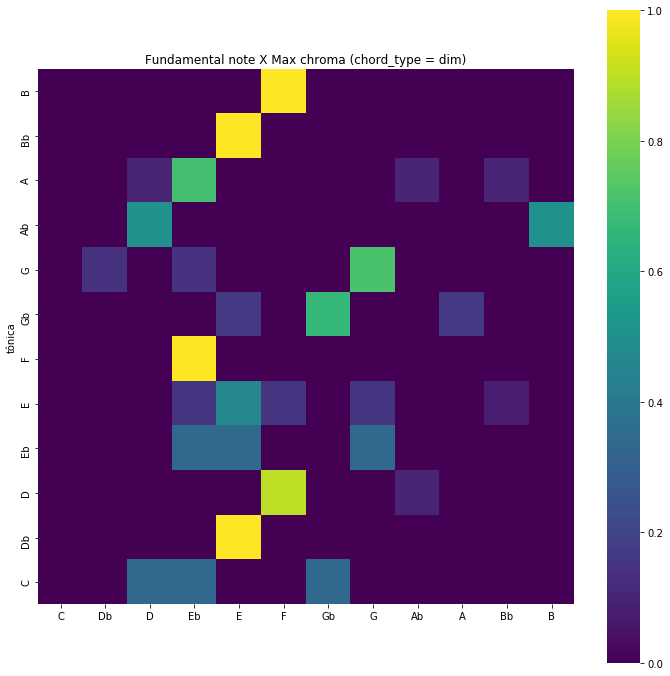

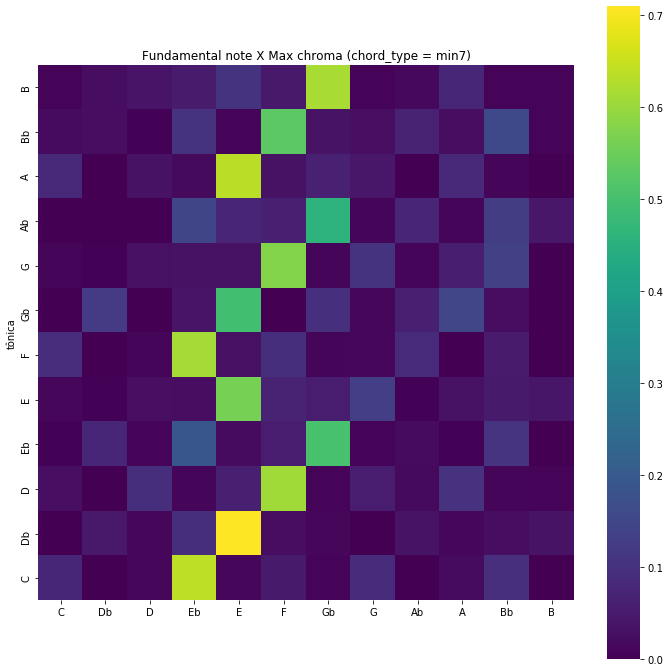

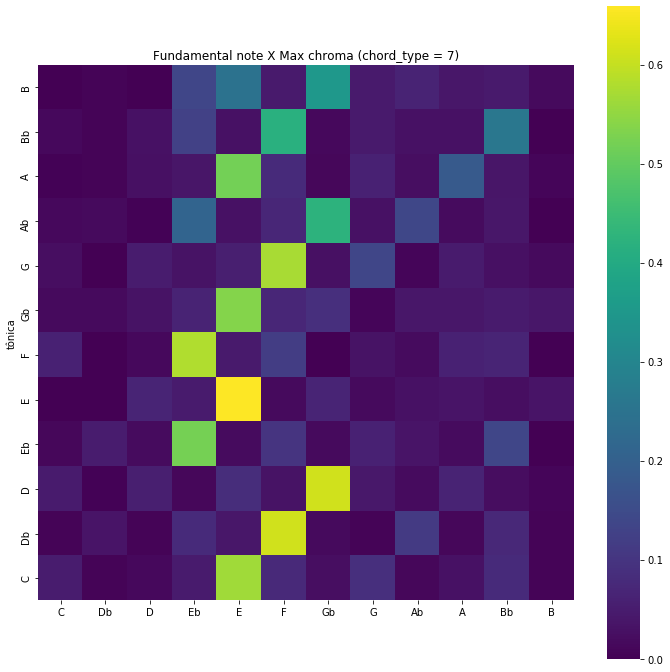

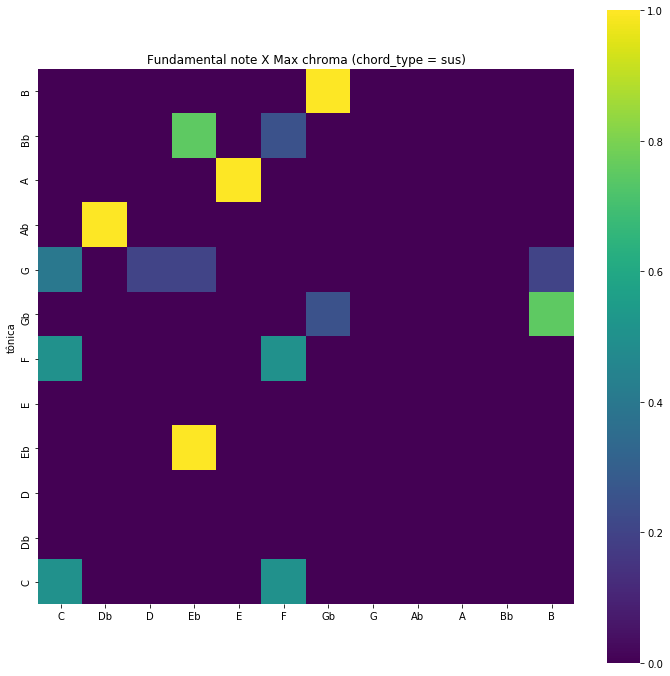

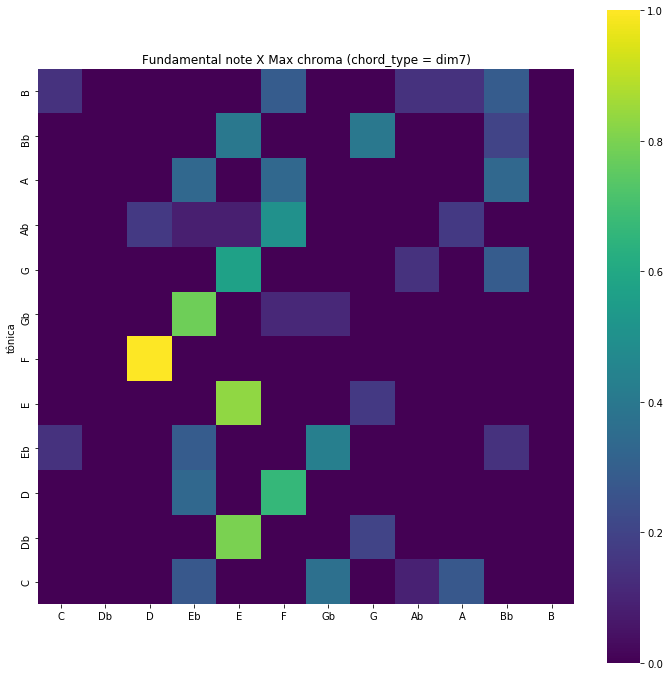

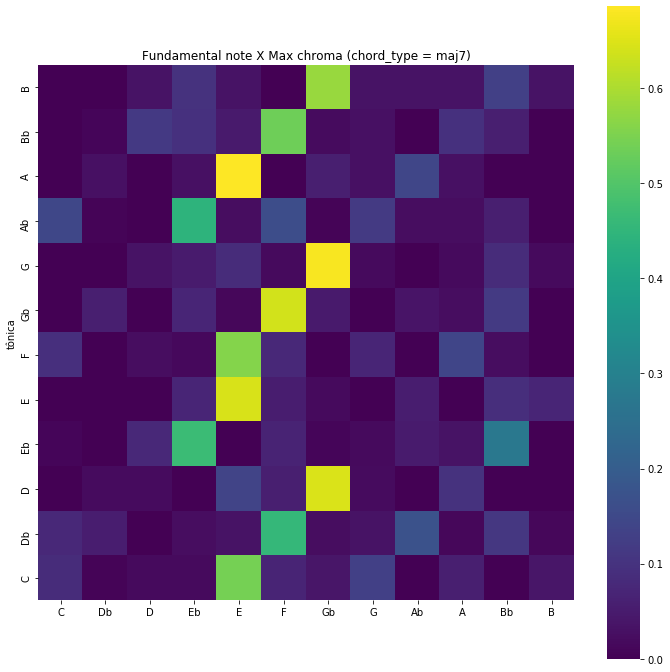

In [76]:
types = list(set(df_model['simplified_chord_type']))
for typ in types:
    
    print(typ)

    df_type = df_model[df_model.chord_type == typ]
    
#     df_type.values[:,:-3]


    df_scatter = pd.DataFrame({'C_max':list(map(func_max, df_type.values[:,1:-7])),
                           'tônica':df_type['note_number'].values})

    df_scatter['C_max'] = df_scatter['C_max'].astype(float)
    df_scatter['count'] = 1

    df_count = df_scatter.groupby(['tônica', 'C_max'])[['count']].sum()


    pivot_heatmap = pd.DataFrame(columns=list(range(1,13)), 
                                 index=list(range(1,13)))
    
    pivot_heatmap.index.name = 'tônica'
    pivot_heatmap = pivot_heatmap.sort_index(ascending=False)



    for i in df_count.index:
    #     print(int(i[0]), int(i[1]), df_count.loc[i]['aux'])
        pivot_heatmap.at[int(i[0]), int(i[1])] = df_count.loc[i]['count']

    pivot_heatmap = pivot_heatmap.fillna(0)

    pivot_heatmap_norm = pivot_heatmap.copy()

    for i in pivot_heatmap_norm.index:
        soma_i = pivot_heatmap_norm.loc[i].sum()
        pivot_heatmap_norm.loc[i] = (pivot_heatmap_norm.loc[i]/soma_i).values

    pivot_heatmap_norm.fillna(0, inplace=True)
    pivot_heatmap_norm

    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(pivot_heatmap_norm, 
                square=True, 
                cmap='viridis',
                xticklabels=notes, 
                yticklabels=notes_reverse
               )
    
    plt.title('Fundamental note X Max chroma (chord_type = {})'.format(typ))

In [75]:
df_type.values[:,1:-7][0]

array([0.4008366930991105, 0.3056588546118716, 0.0757056142034783,
       0.14013840193510027, 0.13132909216643476, 0.5678327616343339,
       0.1347741706869916, 0.16277422754319096, 1.0, 0.18558123127122172,
       0.15211265397619392, 0.08136406774996419], dtype=object)

In [74]:
df_type

,index,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,chord_type,chord_note,song,new_chord_type,simplified_chords,simplified_chord_type,note_number
8,8,0.400837,0.305659,0.075706,0.140138,0.131329,0.567833,0.134774,0.162774,1.000000,0.185581,0.152113,0.081364,maj7,Db,BlueBossa,maj7,maj7,maj7,2
48,2,0.503553,0.159997,0.178279,0.239211,1.000000,0.494085,0.191629,0.506064,0.106778,0.055598,0.090070,0.496195,maj7,C,MamboInn,maj7,maj7,maj7,1
52,6,0.547802,0.137400,0.151100,0.205967,1.000000,0.502411,0.165964,0.490466,0.109154,0.050167,0.091307,0.543010,maj7,C,MamboInn,maj7,maj7,maj7,1
55,9,0.498828,0.158934,0.177170,0.238890,1.000000,0.491360,0.190880,0.506143,0.106681,0.055419,0.089527,0.492973,maj7,C,MamboInn,maj7,maj7,maj7,1
59,13,0.547800,0.137400,0.151099,0.205966,1.000000,0.502412,0.165964,0.490467,0.109154,0.050167,0.091306,0.543010,maj7,C,MamboInn,maj7,maj7,maj7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11266,21,0.873047,0.262015,0.215354,0.708176,0.263259,0.077733,0.166549,1.000000,0.587114,0.106154,0.096453,0.223195,maj7,Ab,Storm,maj7,maj7,maj7,9
11277,32,0.645287,0.170793,0.265905,1.000000,0.324847,0.079405,0.129666,0.704673,0.656954,0.126147,0.064264,0.191241,maj7,Ab,Storm,maj7,maj7,maj7,9
11335,26,0.453077,0.268259,0.380176,0.763067,0.380357,1.000000,0.545907,0.575234,0.875851,0.417656,0.955674,0.304080,maj7,Gb,Afrodisia,maj7,maj7,maj7,7
11407,1,0.061601,0.171840,0.677426,0.166192,0.242189,1.000000,0.239987,0.057400,0.106356,0.592969,0.729804,0.126053,maj7,Bb,moaninbari,maj7,maj7,maj7,11
